## Machine Learning In Sklearn

### Introduction

In the previous lessons, saw the general process in machine learning: 

> We start with training data, and use train a machine learning algorithm to find a hypothesis function that minimizes a cost function.  Once trained, we can then use the hypothesis function to make predictions on observations where the outcome is unknown.

At this point, we're ready to get started with the popular `sklearn` machine learning library.  We'll use our knowledge of the machine learning process to guide us.  

### 1. Gather the data

As we know, the first step in machine learning is to gather our training data.  Here, our data is available in a [csv file](https://raw.githubusercontent.com/jigsawlabs-student/decision-trees-intro/master/3-practical-ds-4/customer_data.csv).  A csv file is just a file where our data is separated by commas.

Let's go get it.

> We import the pandas library, which is a great library for collecting and exploring data.  We use the `read_csv` method to read in the data, and provide the location of the file as an argument.

> Press `shift + return` on the cell below.

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/jigsawlabs-student/decision-trees-intro/master/3-practical-ds-4/customer_data.csv"
df = pd.read_csv(url)
df

So above we have three observations in our training data.  Our features are in the first four columns, and the target column of `customer` is in the last column.   

Unfortunately, our data **will not work in it's current format** with the machine learning library we're about to use.  It needs to be formatted differently.

Let's load up some properly formatted data to see the changes we would need to make.

In [1]:
import pandas as pd
feature_url = "https://raw.githubusercontent.com/jigsawlabs-student/decision-trees-intro/master/3-practical-ds-4/customer_features.csv"
customer_target_url = "https://raw.githubusercontent.com/jigsawlabs-student/decision-trees-intro/master/3-practical-ds-4/customer_targets.csv"
X = pd.read_csv(feature_url)
y = pd.read_csv(customer_target_url, names = ['y'])

> Press shift + return on the cell above.

Let's look at our new variable `X`.

In [2]:
X

attended_college  under_thirty  borough  income
0                 0             1        1       1
1                 2             1        0       1
2                 0             0        0       1

We see that `X` points to only *the features* in our training data.  It does not contain the target values.  We also see that every one of our feature values is now represented as a number.

The data in `X` *may not look like* our original training data, but it is equivalent.  We got to the data in `X` by starting with our original data that had values as text, and then assigning a different number to each unique value in a column. 

> **For example,** for the `attended_college` column, `?` is represented by a `0`, and `Yes` is represented by a `2`.

| Attended College | Under Thirty | Borough   | Income | Customer |
| ---------------- | ------------ | --------- | ------ | :------: |
| ?                | Yes          | Manhattan | < 55   |    0     |
| Yes              | Yes          | Brooklyn  | < 55   |    0     |
| ?                | No           | Brooklyn  | < 55   |    1     |

So we got to the data in X ready by translating all of our feature values into a corresponding number.

Now let's take a look at `y`, which we assigned above.

In [8]:
y

y
0  0
1  0
2  1

`y` contains all of our target values -- did the observation become a customer or not.  This target values were already numeric so we did not need to change them.

In summary, we started with our original data, and separated out our feature data from our target values, assigning the features to `X`, and the target data to `y`.

We also then (somehow) changed our data so that each value is now represented as a number.

### 2. Train a Model

Ok, now that we have our feature data and target data separated, and all of our values represented as a number, we can move into training.  

To do so, we'll use the `sklearn` library.  We start by telling Jupyter to use the `sklearn.tree` module's `DecisionTreeClasifier`.  

In [2]:
from sklearn.tree import DecisionTreeClassifier

> The decision tree classifier is the name of the algorithm we choose to use - a decision tree that will predicts if future observations fall into one category or another.

That line, `from sklearn.tree import DecisionTreeClassifier` gives us the ability to create a tool, which we'll call a model, that makes predictions of our data.

In [9]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

> **What's a Model?** A model is just a tool that takes in our training data and then makes predictions.  

> When we called, `model = DecisionTreeClassifier`, think of us as creating a little robot, fresh from the factory.  We're going to feed it with information, and then it can make predictions about the world.  Because our robot is of the type `DecisionTreeClassifier`, it will make it's predictions by following the training procedure of a decision tree that we described earlier.  

Ok, now that we have a new model, it's time to feed it some data so that it can train it's hypothesis function.  To do so, we call `model.fit` passing through our feature data, X, as one argument and our targets as the other.

In [10]:
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

That it!  We just trained a machine learning model in `sklearn`.  

The process was to create our new model, and pass through the feature data and the related targets.  

```python
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X, y)
```

Our hypothesis function is now in there, but it will take a couple of lines of code to see it.

### 3. Use the Hypothesis Function

Now that we have created and trained our model, we can view the hypothesis function of our decision tree above.  But unfortunately, we need another library to do so.  

> Run the cell below to install the `dtreeviz` library into your notebook environment.  There may be a lot of output after running the cell below.  Just scroll down.

In [9]:
!pip install dtreeviz

Afterwards, we can visualize our decision tree by pressing `shift + return` on the cell below.  

> For now, let's not worry too much about how the code below works, but if you take a look at it, it's not so bad.

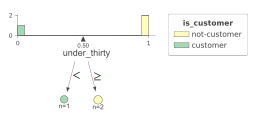

In [55]:
from dtreeviz.trees import dtreeviz
viz_1 = dtreeviz(model,
               X.to_numpy(),
               y.y,
               target_name='is_customer',
               feature_names=X.columns,
               class_names=['not-customer', 'customer']
              )
              
viz_1   

So we can see that our model's hypothesis function makes predictions based on an observation's feature of `under_30`.  

If the lead is under 30, represented by the number 1, the model predicts she is not a customer (in yellow).  If the lead is over thirty, represented by 0, then the model predicts she is a customer (in green). 

Looking at our training data again, this makes sense.

| Attended College | Under Thirty | Borough   | Income | Customer |
| ---------------- | ------------ | --------- | ------ | :------: |
| ?                | Yes          | Manhattan | < 55   |    0     |
| Yes              | Yes          | Brooklyn  | < 55   |    0     |
| ?                | No           | Brooklyn  | < 55   |    1     |

### Predicting with the model

Now the power of our trained model is that we can now, take in the features of a lead where we do not know the outcome, and predict if she will become a customer or not.  

Before we do that, let's check that our model properly predicts the outcomes of the training data.  We do so by passing through the training data's features, and seeing what the model predicts as the target.

> Remember that X contains three observations. 

In [3]:
X

attended_college  under_thirty  borough  income
0                 0             1        1       1
1                 2             1        0       1
2                 0             0        0       1

In [11]:
model.predict(X)

array([0, 0, 1])

> The predicted targets match the targets in the training data.

Ok, now let's use the model to predict the outcome of a lead where we do not know the outcome.

| Attended College | Under Thirty | Borough   | Income | 
| ---------------- | ------------ | --------- | ------ | 
| ?                | No          | Brooklyn | < 55   | 

Once again, we need to represent the features above as numbers.

> Press shift + return below.

In [13]:
observation = [0, 0, 0, 2]

And then we can pass this into the model's predict method.

> Press shift + return on the cell below.

In [14]:
model.predict([observation])

array([1])

> `model.predict` takes a *list* of observations as an argument.

Above, because the lead is not under 30, our model predicts the lead will become a customer.

### Wrapping Up

Ok, let's summarize everything we did.  To train a machine learning model in `sklearn`, we need to:

1. Collect and format our training data

We *collected* our data using the pandas library, and the `read_csv` method as our data was in a CSV file.

In [59]:
import pandas as pd
feature_url = "https://raw.githubusercontent.com/jigsawlabs-student/decision-trees-intro/master/3-practical-ds-4/customer_features.csv"
customer_target_url = "https://raw.githubusercontent.com/jigsawlabs-student/decision-trees-intro/master/3-practical-ds-4/customer_targets.csv"
X = pd.read_csv(feature_url)
y = pd.read_csv(customer_target_url, names = ['y'])

Formatting our data means: 
1. Our feature values `X` are separated from our target values `y`, and
2. Every value in our training set is a number

> Let's confirm that we changed our feature values to numbers.

In [82]:
X

attended_college  under_thirty  borough  income
0                 0             1        1       1
1                 2             1        0       1
2                 0             0        0       1

2. Train the model

We train a model by loading in the `sklearn` `DecisionTreeClassifier` and initializing and training our model.

In [83]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

3. Predict with our hypothesis function

Our model now has a hypothesis function.  We now use the `predict` method to predict the target of any observation.  To do so, we pass through a `list` of observations, where each row of features is also represented by a list.

So below we have two observations.

In [10]:
new_observations = [
    [0, 0, 0, 2],
    [0, 1, 0, 2]
]

Which we can pass to our predict method.

In [14]:
model.predict(new_observations)

array([1, 0])

And our model predicts the first observation will become a customer, and that the second will not.

### Summary

In this lesson, we saw machine learning with the `sklearn` library.  Notice that our procedure stayed the same: (1) gather the training data, (2) train the model (3) use the hypothesis function to make predictions.

We gathered the training data with the `pd.read_csv` method from pandas, and then trained the model by first creating a new model `model = DecisionTreeClassifier()`, and then calling `model.fit`.  From there, we could make predictions by inputting the features of new observations with `model.predict(future_observations)`, where each observation is a list of features.

<center>
<a href="https://www.jigsawlabs.io/free" style="position: center"><img src="jigsaw-main.png" width="15%" style="text-align: center"></a>
</center>